In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
def open_dataset(filename, sep=';'):
    data = []
    f = open(filename, 'r')
    win = []
    for i in f.readlines():
        i = i.strip()
        if i == "":
            continue
        elif i != '--':
            win.append([float(x) for x in i.split(',')])
        else:
            data.append(win)
            win = []
    return data


In [3]:
dataset = open_dataset('log_file.txt')

ValueError: could not convert string to float: (0

In [4]:
print len(dataset)

NameError: name 'dataset' is not defined

NameError: name 'dataset' is not defined

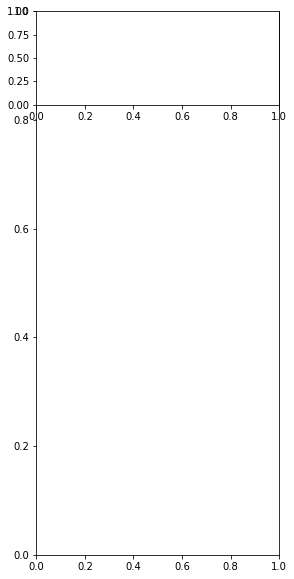

In [5]:
from collections import defaultdict
win = 5

fig = figure(figsize=(20,10))

ax = fig.add_subplot(1,4, 1)

s_lens = []
for p in range(20):
    ax = fig.add_subplot(5,4, p+1)
    
    clusters = defaultdict(list)
    
    for x, y in zip([int(j[0]) for j in dataset[p]], [float(j[1]) for j in dataset[p]]):
        clusters[x].append(y)
    
    lens = []
    for k, v in clusters.iteritems():
        
        var = np.var(v)
        
        lens.append(len(v))

        ax.scatter(k, np.var(v))
        ax.set_xlim((-1,10))
        ax.set_xticks(range(-1,11,2))
        ax.set_xlabel('Cluster ID')
        ax.set_ylabel('Smallest Eigen proj')
    
    s_lens.append(np.mean(lens))
    print "In plot {} mean length {}".format(p, np.mean(lens))
plt.tight_layout()
plt.show()

fig = figure(figsize=(12,3))
plt.hist(s_lens)
plt.show()

#### PLOT ALL VARS

In [6]:
all_vars = []
lens = []

count = 0
nclusters = 0
for p in range(len(dataset)):
    clusters = defaultdict(list)
    for x, y in zip([int(j[0]) for j in dataset[p]], [float(j[1]) for j in dataset[p]]):
        clusters[x].append(y)
    
    for k, v in clusters.iteritems():
        var = np.var(v)
        all_vars.append(var)
        lens.append(len(v))
        nclusters +=1
    
    count +=1

print "Total number of windows: {}".format(count)
print "Total number of clusters: {}".format(nclusters)
plt.plot(all_vars)
plt.show()

NameError: name 'dataset' is not defined

In [54]:
dataset = open_dataset('log_file.txt')
print "Dataset length: {}".format(len(dataset))

Dataset length: 70


Plot #0
Points in clusters #0.0: [[1.0, 90.6648], [2.0, 90.2552], [3.0, 90.0184], [4.0, 90.0093], [5.0, 90.0281], [6.0, 90.0603], [7.0, 90.1157], [8.0, 90.2032]]
Points in clusters #1.0: [[1.0, 92.0089], [2.0, 90.8437], [3.0, 90.7494], [4.0, 90.0526], [5.0, 90.1375], [6.0, 90.1502], [7.0, 90.0997], [8.0, 90.1177]]
Points in clusters #2.0: [[1.0, 91.0962], [2.0, 91.0031], [3.0, 90.7097], [4.0, 90.2601], [5.0, 90.0574], [6.0, 90.048], [7.0, 90.0857], [8.0, 90.1572]]
Points in clusters #3.0: [[2.0, 90.3362], [3.0, 90.0734], [4.0, 90.0432], [5.0, 90.036], [6.0, 90.0043], [7.0, 90.0994], [8.0, 90.1389]]
Points in clusters #4.0: [[5.0, 90.3267], [6.0, 90.3797], [7.0, 91.0676], [8.0, 90.7126]]
Plot #1
Points in clusters #0.0: [[1.0, 90.3521], [2.0, 90.1904], [3.0, 90.879], [4.0, 91.3154], [5.0, 91.7714], [6.0, 92.2209], [7.0, 96.0217], [8.0, 96.3331]]
Points in clusters #1.0: [[1.0, 91.9694], [2.0, 90.4878], [3.0, 90.0472], [4.0, 90.0186], [5.0, 90.0152], [6.0, 90.2981], [7.0, 90.4], [8.0, 90

Points in clusters #3.0: [[2.0, 94.5765], [3.0, 143.74], [4.0, 99.0522], [5.0, 94.2802], [6.0, 94.6685], [7.0, 93.009], [8.0, 92.7715]]
Points in clusters #4.0: [[7.0, 95.3403], [8.0, 93.8361]]
Plot #12
Points in clusters #0.0: [[1.0, 125.414], [2.0, 125.414], [3.0, 99.6628], [4.0, 139.204], [5.0, 138.971], [6.0, 138.971], [7.0, 138.971], [8.0, 126.014]]
Points in clusters #1.0: [[1.0, 92.1087], [2.0, 90.0773], [3.0, 92.2856], [4.0, 92.4273], [5.0, 93.4897], [6.0, 93.4897], [7.0, 97.2004], [8.0, 97.8392]]
Points in clusters #2.0: [[1.0, 93.3181], [2.0, 91.9087], [3.0, 90.4522], [4.0, 90.5275], [5.0, 90.5275], [6.0, 90.5275], [7.0, 90.1953], [8.0, 90.8815]]
Points in clusters #3.0: [[2.0, 92.5523], [3.0, 91.6559], [4.0, 91.5562], [5.0, 91.4377], [6.0, 91.3552], [7.0, 91.8294], [8.0, 91.1821]]
Points in clusters #4.0: [[3.0, 93.1555], [4.0, 94.4273], [5.0, 113.529], [6.0, 151.275], [7.0, 148.532], [8.0, 143.221]]
Points in clusters #5.0: [[3.0, 90.0434], [4.0, 92.7251], [5.0, 93.3755], [

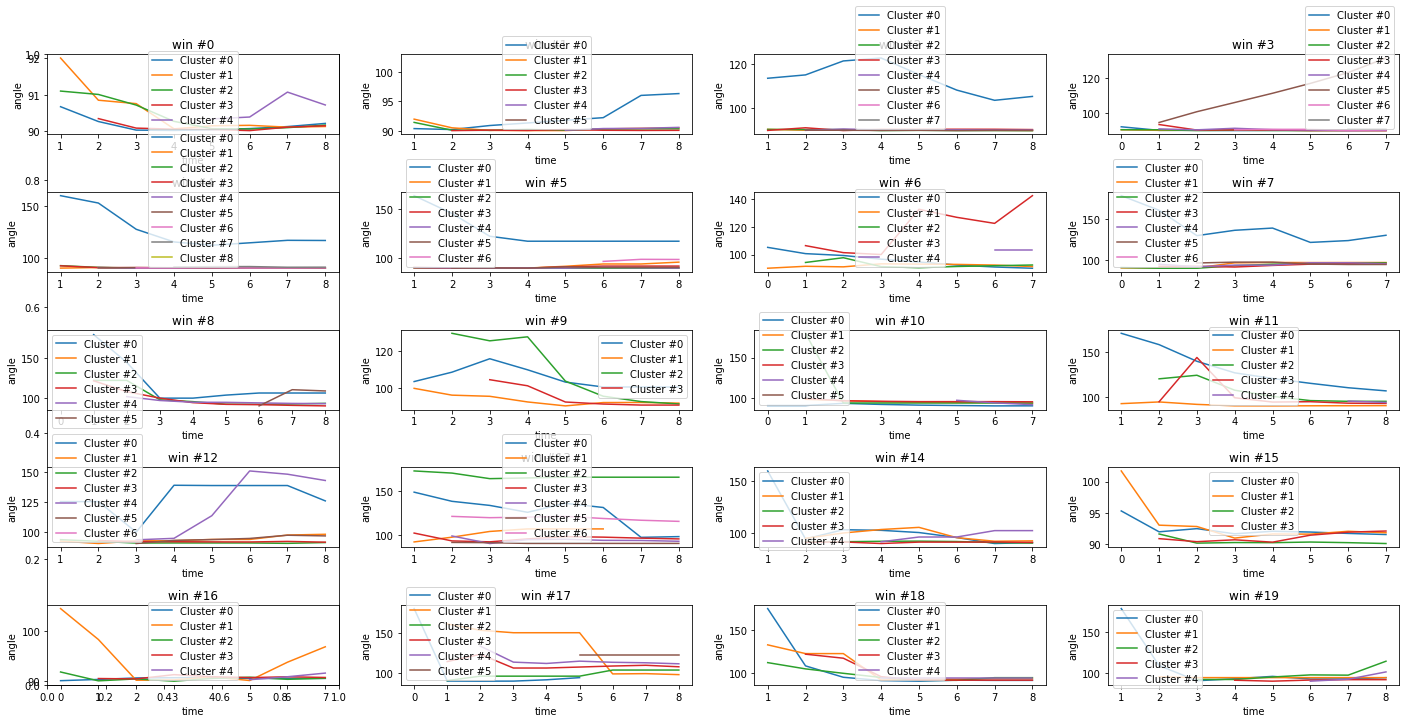

In [57]:
from collections import defaultdict

fig = figure(figsize=(20,10))

ax = fig.add_subplot(1,4, 1)

s_lens = []

r = range(20)
for p in r:
    
    data = dataset[p]
    
    print "Plot #{}".format(p)
    
    ax = fig.add_subplot(5,4, p+1-r[0])
    
    points = defaultdict(list)
    for x,stamp,y in data:
        points[x].append([stamp,y])

    for k in points.keys():
        if len(points[k]) > 8:
            points[k] = points[k][1:]
        ax.plot([pt[0] for pt in points[k]], [pt[1] for pt in points[k]], label="Cluster #{}".format(int(k)))
        ax.legend(loc='best')
        ax.set_ylabel('angle')
        ax.set_xlabel('time')
        ax.set_title('win #{}'.format(p))
        print "Points in clusters #{}: {}".format(k,points[k])

plt.tight_layout()
plt.show()